In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv')


In [ ]:
data = data.drop('id', axis=1) #data에서 필요없는 id column 제거
data

In [ ]:
# 결측값 유무 확인
data.isnull().sum()

sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
target       0
dtype: int64

In [ ]:
# 기초통계량 확인
data.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,-1.122174,-1.024673,-0.672769,-0.147724,-0.327494,-0.423462,0.676275,-0.936019,-0.797432,-0.704585,...,-0.356441,-0.927744,-0.589060,-0.081374,-0.370812,-0.726941,-0.809534,-0.495062,-0.743585,1.523340
std,11.486353,7.399859,26.519159,15.551500,11.461970,7.314322,26.869479,15.598104,12.015022,7.384626,...,16.531906,12.021560,7.440983,25.923355,15.541803,11.636507,7.469744,25.291238,16.300385,1.118221
min,-94.746969,-63.942094,-122.195138,-111.870691,-94.147972,-70.916786,-105.956553,-102.965354,-81.268085,-47.937561,...,-127.797649,-99.115177,-86.193378,-105.751637,-105.890010,-74.977182,-74.006065,-121.097086,-123.876153,0.000000
25%,-4.036597,-4.031957,-14.878500,-7.116633,-3.968687,-3.957699,-13.937806,-8.053214,-4.031148,-3.983620,...,-7.980628,-4.004750,-4.001112,-14.096840,-8.004561,-3.981055,-3.988965,-13.998874,-7.873898,1.000000
50%,-0.951398,-1.015582,-0.961088,-0.890469,-0.871690,-0.804810,0.058910,-1.095551,-0.944613,-0.932964,...,-0.926120,-0.907301,-0.897015,-0.954791,-0.989293,-0.889780,-0.928504,-0.955684,-1.019547,2.000000
75%,2.895540,2.140456,13.974075,6.110973,2.970387,3.006144,13.934438,4.955494,2.235557,2.883284,...,6.002985,2.863184,2.951682,13.903783,5.922250,2.972719,2.519426,13.926128,5.121679,3.000000
max,68.876142,39.913391,127.124171,102.015561,89.059852,34.923040,120.046277,125.160611,74.101715,47.030119,...,127.161055,58.113657,59.105536,123.179253,111.137925,54.098746,35.896503,125.974107,104.959621,3.000000


In [ ]:
data["target"].value_counts().sort_index()

0    569
1    574
2    593
3    599
Name: target, dtype: int64

In [ ]:
data.max().max()

127.1610552

In [ ]:
data.min().min()

-127.797649

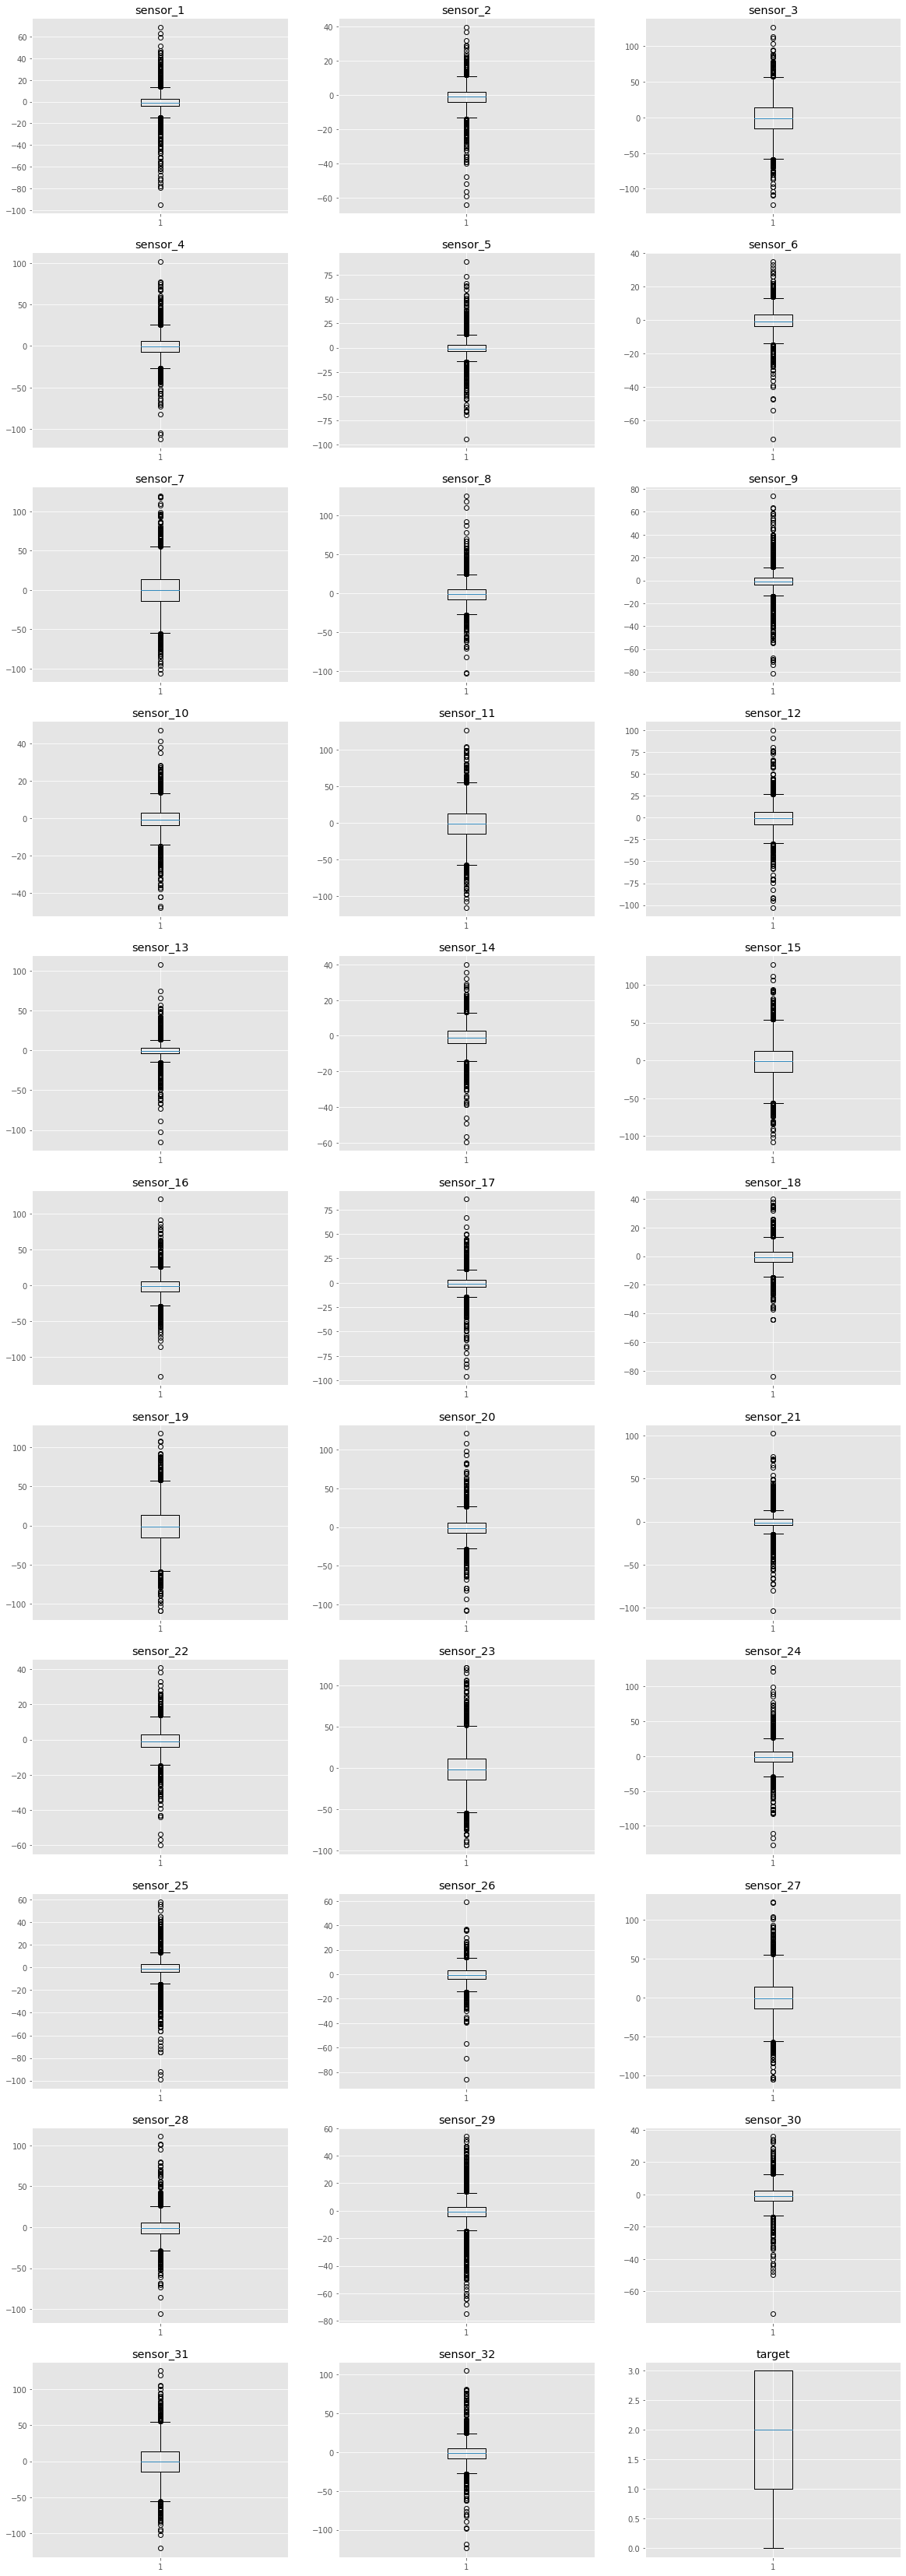

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = data.columns
plt.figure(figsize=(20,60))

for i in range(len(feature)):
    plt.subplot(11,3,i+1)
    plt.title(feature[i])
    plt.boxplot(data[feature[i]])
plt.show()

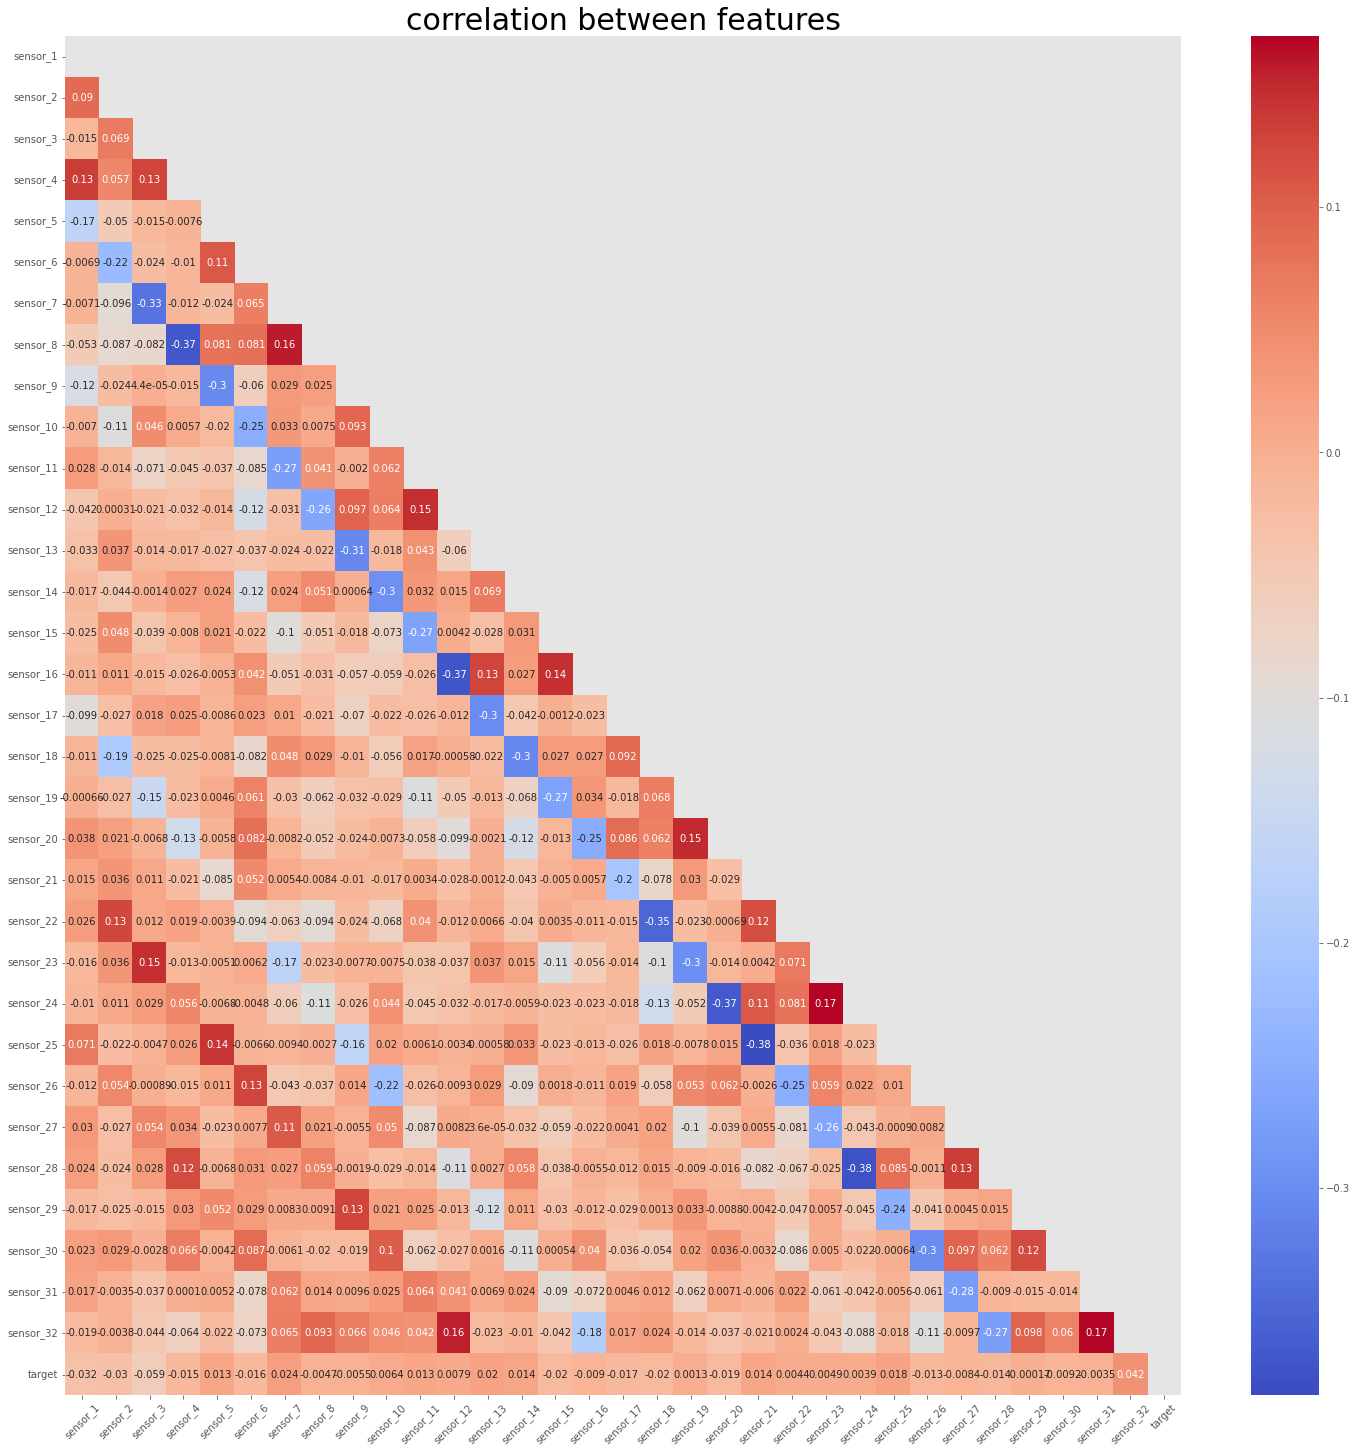

In [ ]:
plt.figure(figsize=(25,25))

heat_table = data.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=10, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=10)
plt.title('correlation between features', fontsize=30)
plt.show()

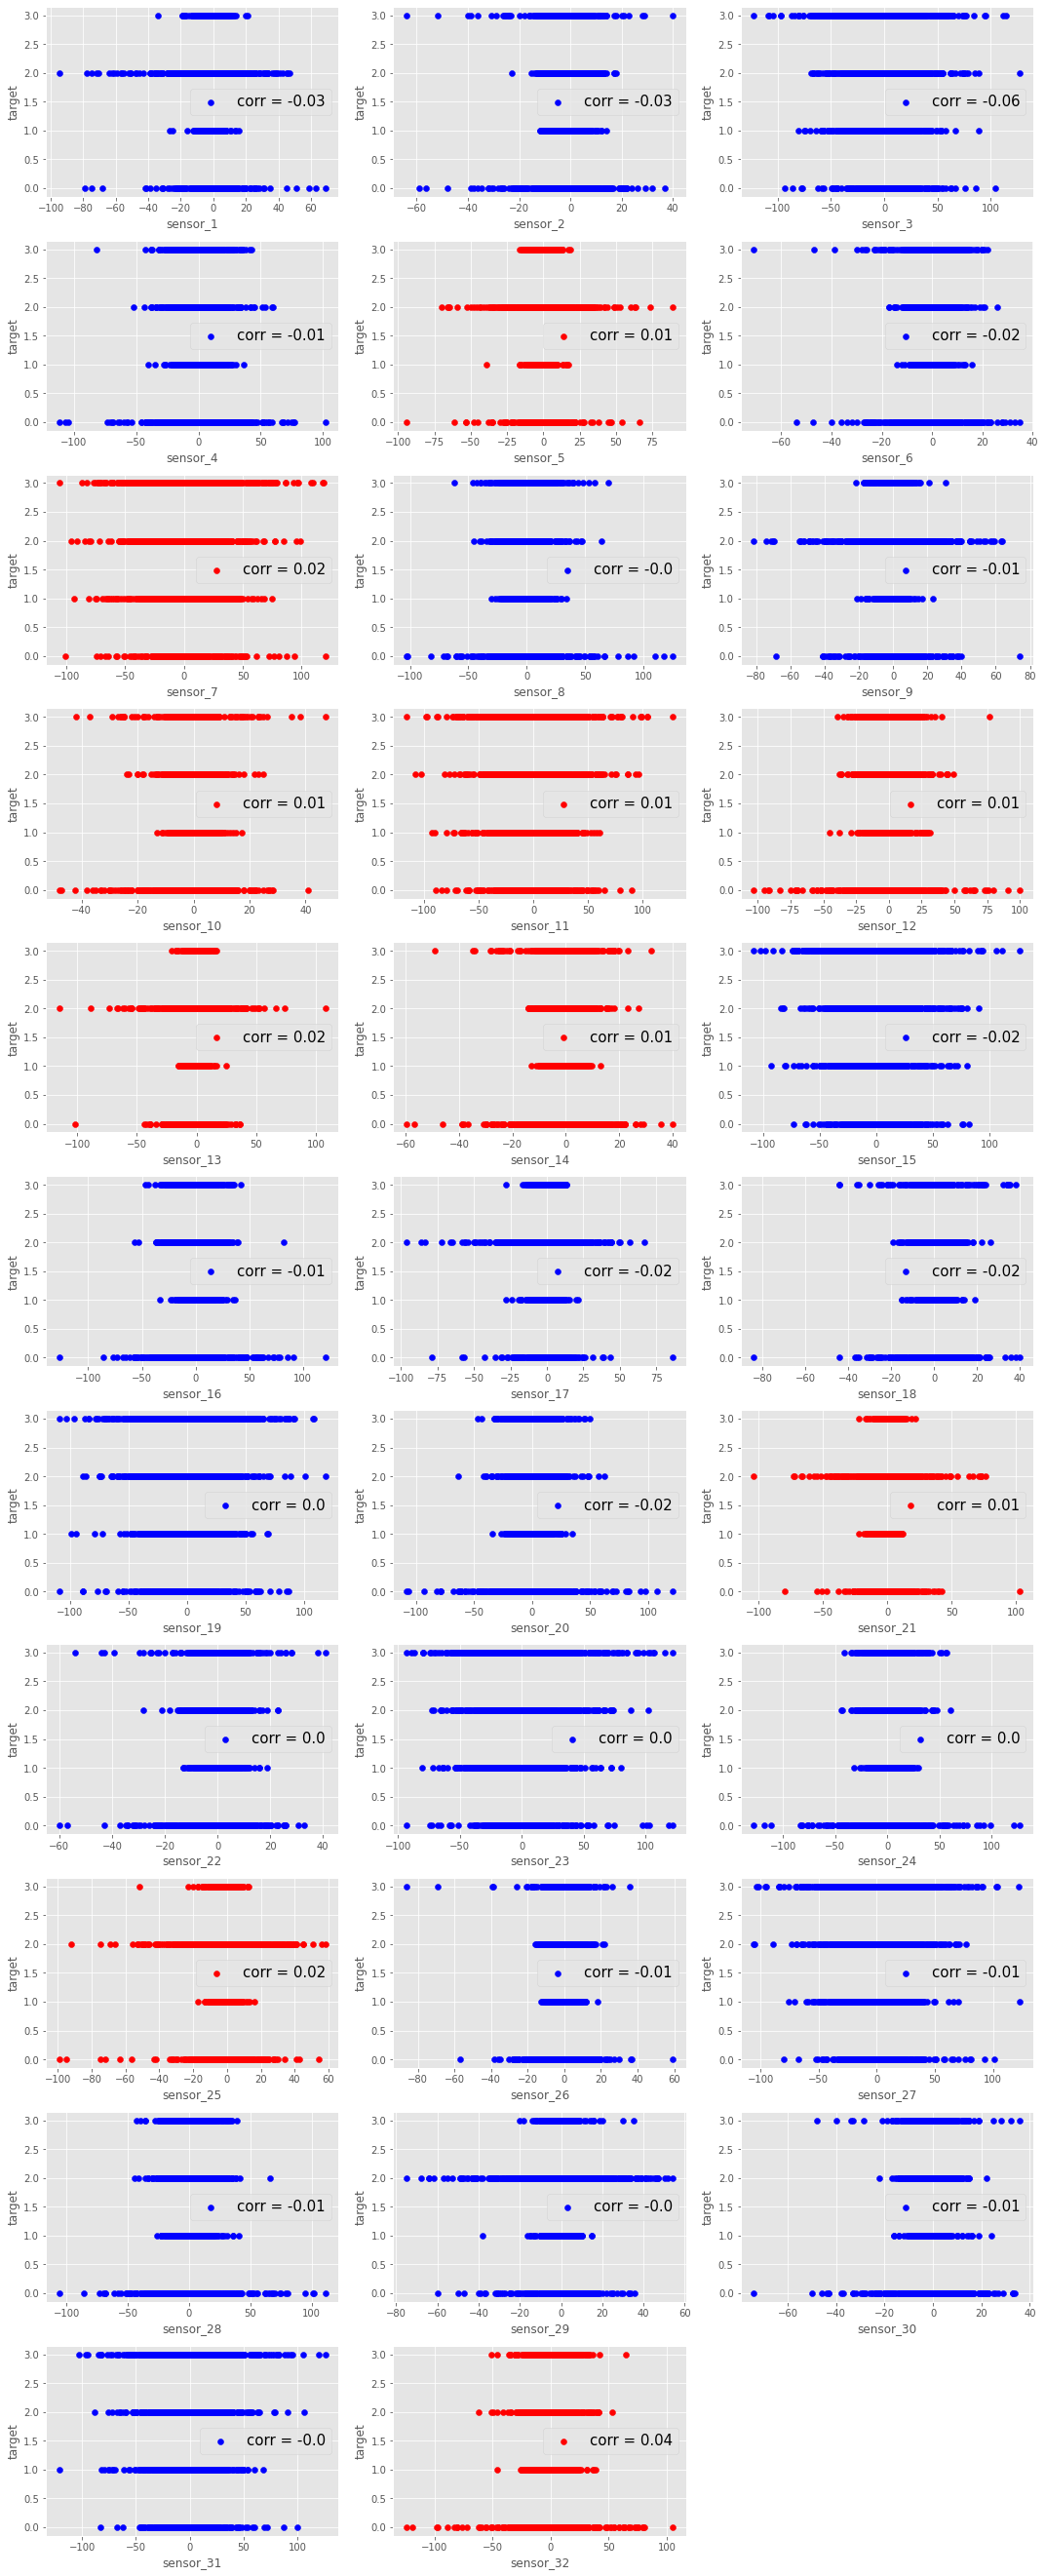

In [ ]:
target = "target"
feature = data.columns

plt.figure(figsize=(15,40))

# id는 제외하고 시각화합니다.
for i in range(len(feature[:-1])):
    plt.subplot(11,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = data[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(data[feature[i]], data[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

시퀀셜

In [ ]:
dataset = data.values
X = dataset[:, 0:32].astype(float)
Y_obj = dataset[:,32]

In [ ]:
# softmax 활용을 위한 원핫 인코딩
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() 
encoder.fit(Y_obj) 
Y_encoded = to_categorical(encoder.transform(Y_obj))

Y_encoded

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
#1차 시도
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X, Y_encoded, epochs=10, batch_size=1)

Epoch 1/10
2335/2335 [==============================] - 4s 2ms/step - loss: 2.0578 - accuracy: 0.2467
Epoch 2/10
2335/2335 [==============================] - 4s 2ms/step - loss: 1.3808 - accuracy: 0.2638
Epoch 3/10
2335/2335 [==============================] - 4s 2ms/step - loss: 1.3587 - accuracy: 0.2874
Epoch 4/10
2335/2335 [==============================] - 4s 2ms/step - loss: 1.3200 - accuracy: 0.3178
Epoch 5/10
2335/2335 [==============================] - 4s 2ms/step - loss: 1.2771 - accuracy: 0.3627
Epoch 6/10
2335/2335 [==============================] - 4s 2ms/step - loss: 1.2142 - accuracy: 0.3970
Epoch 7/10
2335/2335 [==============================] - 4s 2ms/step - loss: 1.1597 - accuracy: 0.4428
Epoch 8/10
2335/2335 [==============================] - 4s 2ms/step - loss: 1.1284 - accuracy: 0.4501
Epoch 9/10
2335/2335 [==============================] - 4s 2ms/step - loss: 1.0872 - accuracy: 0.4557
Epoch 10/10
2335/2335 [==============================] - 4s 2ms/step - loss: 1.062

In [ ]:
#기대치에 미치지 못하는 성능, 뉴런 수와 은닉층의 수를 추가하여 모델학습 강화 및 하이퍼 파리미터 조정
#원핫 인코딩이 필요하지 않은 sparse_categorical_crossentropy손실함수 적용

model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X, Y_obj, epochs=20, batch_size=1)

Epoch 1/20
2335/2335 [==============================] - 5s 2ms/step - loss: 1.4283 - accuracy: 0.4094
Epoch 2/20
2335/2335 [==============================] - 5s 2ms/step - loss: 0.9958 - accuracy: 0.5901
Epoch 3/20
2335/2335 [==============================] - 5s 2ms/step - loss: 0.8671 - accuracy: 0.6591
Epoch 4/20
2335/2335 [==============================] - 4s 2ms/step - loss: 0.7305 - accuracy: 0.7075
Epoch 5/20
2335/2335 [==============================] - 5s 2ms/step - loss: 0.6527 - accuracy: 0.7533
Epoch 6/20
2335/2335 [==============================] - 5s 2ms/step - loss: 0.5787 - accuracy: 0.7906
Epoch 7/20
2335/2335 [==============================] - 4s 2ms/step - loss: 0.5222 - accuracy: 0.8073
Epoch 8/20
2335/2335 [==============================] - 4s 2ms/step - loss: 0.4497 - accuracy: 0.8334
Epoch 9/20
2335/2335 [==============================] - 4s 2ms/step - loss: 0.3663 - accuracy: 0.8660
Epoch 10/20
2335/2335 [==============================] - 5s 2ms/step - loss: 0.379

In [ ]:
# 제출 데이터 평가 결과 자체 성능 평가에 비해 분류 일반화 성능이 기대치에 미치지 못함, 과적합 의심
# 과적합 문제 완화를 위한 Dropout 활용 및 하이퍼 파라미터 조정
from keras.layers import Dropout

model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X, Y_obj, epochs=100, batch_size=8)

Epoch 1/100
292/292 [==============================] - 1s 3ms/step - loss: 5.6385 - accuracy: 0.2527
Epoch 2/100
292/292 [==============================] - 1s 3ms/step - loss: 2.1515 - accuracy: 0.2625
Epoch 3/100
292/292 [==============================] - 1s 2ms/step - loss: 1.6384 - accuracy: 0.2561
Epoch 4/100
292/292 [==============================] - 1s 2ms/step - loss: 1.4863 - accuracy: 0.2668
Epoch 5/100
292/292 [==============================] - 1s 2ms/step - loss: 1.4326 - accuracy: 0.2561
Epoch 6/100
292/292 [==============================] - 1s 3ms/step - loss: 1.4246 - accuracy: 0.2664
Epoch 7/100
292/292 [==============================] - 1s 2ms/step - loss: 1.4056 - accuracy: 0.2685
Epoch 8/100
292/292 [==============================] - 1s 2ms/step - loss: 1.3992 - accuracy: 0.2788
Epoch 9/100
292/292 [==============================] - 1s 2ms/step - loss: 1.3882 - accuracy: 0.2848
Epoch 10/100
292/292 [==============================] - 1s 3ms/step - loss: 1.3864 - accura

랜덤포레스트

In [ ]:
# 모델 훈련을 위해 트레인 셋과 테스트 셋 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y_obj, test_size = 0.2, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0, n_jobs = -1)
rf_clf.fit(x_train, y_train)

predict = rf_clf.predict(x_test)
print(accuracy_score(y_test,predict))
# 데이콘 제출 결과 0.7638

In [ ]:
# 그리드 서치를 통해서 하이퍼 파라미터 탐색
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [100, 120, 140],
           'max_depth' : [16, 20, 24],
           'min_samples_leaf' : [0, 2, 4],
           'min_samples_split' : [2, 4]
            }

rf_clf = RandomForestClassifier()
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
# 그리드 서치 결과에 따른 하이퍼 파라미터 입력 후 정확도 측정
rf_clf = RandomForestClassifier(n_estimators=140, 
                                max_depth=24, 
                                min_samples_leaf=2,
                                min_samples_split=4,
                                random_state=0, n_jobs = -1)
rf_clf.fit(x_train, y_train)

predict = rf_clf.predict(x_test)
print(accuracy_score(y_test,predict))
# 데이콘 제출 결과 0.7582

0.7558886509635975


앙상블

In [ ]:
test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv')
X_test = test.drop(['id'], axis=1)

In [ ]:
#데이터를 0~1 값으로 정규화
def get_preprocessed_data(train, test): 
    train = np.array(X/255.0, dtype=np.float32)
    test = np.array(X_test/255.0, dtype=np.float32)
    
    return train, test

X, X_test =  get_preprocessed_data(X, X_test)

In [ ]:
# - 값이 있어서 MinMaxScalar를 이용해 한번더 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

# 모델들을 할당할 리스트를 생성
clfs = []

# estimators 리스트에 모델들을 추가
rf = RandomForestClassifier()
clfs.append(rf)

gbc = GradientBoostingClassifier()
clfs.append(gbc)

etc = ExtraTreesClassifier()
clfs.append(etc)

# 모들의 파라미터들을 할당할 리스트를 생성
params = []

# params 리스트에 성능을 비교하고자하는 파라미터들 추가
params_rf = {'n_estimators' : [90, 100, 110, 120],
            'min_samples_split' : [2,3,4]}
params.append(params_rf)

params_gbc = {'learning_rate':[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15],
             'n_estimators':[60,70,80,90,100,110,120,130,140,150]}
params.append(params_gbc)

params_etc = {'n_estimators' : [50,60,70,80,90,100,110,120,130,140,150]}
params.append(params_etc)

In [ ]:
# 루프 진행정도를 한줄로 출력해서 보기 위함
# GridSearchCV를 이용해 모델 최적화
from tqdm.auto import tqdm

def gridSearchCV(models,params):
    best_models=[]
    for i in tqdm(range(0,len(models))):
        model_grid = GridSearchCV(models[i], params[i], n_jobs = 10,verbose=1, cv=5)
        model_grid.fit(X, Y_obj)
        best_models.append(model_grid.best_estimator_)
    return best_models

best_model_list = gridSearchCV(clfs,params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 110 candidates, totalling 550 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits


In [ ]:
# 최적화된 모델들 확인
best_model_list

[RandomForestClassifier(min_samples_split=3, n_estimators=120),
 GradientBoostingClassifier(learning_rate=0.14, n_estimators=150),
 ExtraTreesClassifier(n_estimators=140)]

In [ ]:
# 최적화된 모델들을 사용
best_models = [
    ('rf', RandomForestClassifier(n_estimators=120)),
    ('GBR',GradientBoostingClassifier(learning_rate=0.14, n_estimators=150)),
    ('ET', ExtraTreesClassifier(n_estimators=140))
]

# 앙상블 기법을 위한 패키지를 호출
from sklearn.ensemble import VotingClassifier

# 앙상블 모델을 학습
voting_clf = VotingClassifier(estimators=best_models,voting='soft') # voting 파라미터를 'soft' 로 설정하는 경우 모델의 output의 평균을 이용해 라벨을 예측
voting_clf.fit(X, Y_obj)

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=120)),
                             ('GBR',
                              GradientBoostingClassifier(learning_rate=0.14,
                                                         n_estimators=150)),
                             ('ET', ExtraTreesClassifier(n_estimators=140))],
                 voting='soft')

In [ ]:
pred = voting_clf.predict(X_test)

array([0., 0., 1., ..., 2., 0., 3.])

0.8210

CNN

In [ ]:
train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/train.csv")
test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv')

In [ ]:
x_train = train.drop(['id','target'], axis=1)
y_train = train.target
x_test = test.drop(['id'], axis=1)

In [ ]:
def get_preprocessed_data(train, test): 
    train = np.array(x_train/255.0, dtype=np.float32)
    test = np.array(x_test/255.0, dtype=np.float32)
    
    return train, test

x_train, x_test =  get_preprocessed_data(x_train, x_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train = np.array(x_train).reshape(-1, 8, 4, 1)
x_test = np.array(x_test).reshape(-1, 8, 4, 1)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D 
from tensorflow.keras.optimizers import Adam 

In [ ]:
input_tensor = Input(shape=(8, 4, 1)) 

x = Conv2D(filters=128, kernel_size=(3, 2), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=128, kernel_size=(3, 2), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 1))(x)

In [ ]:
x = Conv2D(filters=256, kernel_size=(3, 2), padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=(3, 2), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

In [ ]:
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

In [ ]:
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 4, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 8, 4, 128)         896       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 128)         98432     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 128)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         196864    
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         393472    
                                                             

In [ ]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=40, epochs=23, validation_split=0.15)

Epoch 1/23
50/50 [==============================] - 9s 156ms/step - loss: 1.5394 - accuracy: 0.2394 - val_loss: 1.4059 - val_accuracy: 0.2536
Epoch 2/23
50/50 [==============================] - 6s 126ms/step - loss: 1.4155 - accuracy: 0.2545 - val_loss: 1.3999 - val_accuracy: 0.2194
Epoch 3/23
50/50 [==============================] - 6s 125ms/step - loss: 1.3166 - accuracy: 0.3367 - val_loss: 1.1311 - val_accuracy: 0.4872
Epoch 4/23
50/50 [==============================] - 6s 126ms/step - loss: 0.9884 - accuracy: 0.5907 - val_loss: 0.8224 - val_accuracy: 0.6667
Epoch 5/23
50/50 [==============================] - 6s 126ms/step - loss: 0.8156 - accuracy: 0.6663 - val_loss: 0.8192 - val_accuracy: 0.6809
Epoch 6/23
50/50 [==============================] - 6s 125ms/step - loss: 0.7444 - accuracy: 0.6976 - val_loss: 0.6882 - val_accuracy: 0.7293
Epoch 7/23
50/50 [==============================] - 6s 125ms/step - loss: 0.6814 - accuracy: 0.7193 - val_loss: 0.7108 - val_accuracy: 0.6980
Epoch 

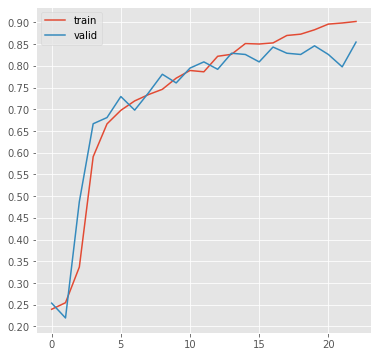

In [ ]:
import matplotlib.pyplot as plt

def show_history(history):
  plt.figure(figsize=(6, 6))
  plt.yticks(np.arange(0, 1, 0.05))
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='valid')
  plt.legend()

show_history(history)

In [ ]:
submission = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/sample_submission.csv")

0.8428

In [ ]:
pred = model.predict(x_test)

In [ ]:
predicted = pred.argmax(axis=-1)

In [ ]:
predicted

array([0, 0, 1, ..., 0, 0, 3])

In [ ]:
submission['target'] = predicted